In [34]:
import numpy as np

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
import io

In [37]:
dataset=pd.read_csv('final1.csv')

In [38]:
dataset

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition,Skewness.1,Kurtosis.1
0,0.142599,365.0,366,1.425985,2.033434,0.897223,0.105681,6,362,368,36513,100,Good,-0.105681,-0.897223
1,0.126027,368.0,368,1.260271,1.588283,0.395387,0.265678,5,366,371,36826,100,Good,0.265678,-0.395387
2,0.097333,371.0,371,0.973331,0.947374,0.400559,0.177908,4,369,373,37089,100,Good,-0.177908,-0.400559
3,0.099372,373.0,373,0.993718,0.987475,0.824843,0.072199,4,371,375,37332,100,Good,0.072199,-0.824843
4,0.094554,376.0,376,0.945537,0.894040,0.187940,0.205709,5,373,378,37557,100,Good,-0.205709,-0.187940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.069559,325.0,330,10.695586,114.395556,0.435310,0.668873,54,290,344,32322,100,Crater wear,-0.668873,0.435310
296,1.131819,324.5,327,11.318190,128.101414,0.008641,0.555331,53,291,344,32314,100,Crater wear,-0.555331,-0.008641
297,1.137146,316.5,316,11.371464,129.310202,0.046520,0.069875,56,285,341,31677,100,Crater wear,-0.069875,-0.046520
298,1.971869,344.5,346,19.718688,388.826667,0.073315,1.185157,74,283,357,33304,100,Crater wear,-1.185157,-0.073315


In [39]:
dataset.drop(['Skewness.1','Kurtosis.1'],axis=1,inplace=True)

In [40]:
dataset.head()

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition
0,0.142599,365.0,366,1.425985,2.033434,0.897223,0.105681,6,362,368,36513,100,Good
1,0.126027,368.0,368,1.260271,1.588283,0.395387,0.265678,5,366,371,36826,100,Good
2,0.097333,371.0,371,0.973331,0.947374,0.400559,0.177908,4,369,373,37089,100,Good
3,0.099372,373.0,373,0.993718,0.987475,0.824843,0.072199,4,371,375,37332,100,Good
4,0.094554,376.0,376,0.945537,0.894040,0.187940,0.205709,5,373,378,37557,100,Good


In [41]:
x=dataset.iloc[:,0:12]
y=dataset.iloc[:,12]

In [42]:
x

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count
0,0.142599,365.0,366,1.425985,2.033434,0.897223,0.105681,6,362,368,36513,100
1,0.126027,368.0,368,1.260271,1.588283,0.395387,0.265678,5,366,371,36826,100
2,0.097333,371.0,371,0.973331,0.947374,0.400559,0.177908,4,369,373,37089,100
3,0.099372,373.0,373,0.993718,0.987475,0.824843,0.072199,4,371,375,37332,100
4,0.094554,376.0,376,0.945537,0.894040,0.187940,0.205709,5,373,378,37557,100
...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.069559,325.0,330,10.695586,114.395556,0.435310,0.668873,54,290,344,32322,100
296,1.131819,324.5,327,11.318190,128.101414,0.008641,0.555331,53,291,344,32314,100
297,1.137146,316.5,316,11.371464,129.310202,0.046520,0.069875,56,285,341,31677,100
298,1.971869,344.5,346,19.718688,388.826667,0.073315,1.185157,74,283,357,33304,100


In [43]:
y

0             Good
1             Good
2             Good
3             Good
4             Good
          ...     
295    Crater wear
296    Crater wear
297    Crater wear
298    Crater wear
299    Crater wear
Name: Condition, Length: 300, dtype: object

In [44]:
bestfeatures=SelectKBest(score_func=chi2,k=12)
fit=bestfeatures.fit(x,y)

In [45]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [46]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']

In [47]:
featureScores

,Specs,Score
0,Standard Error,160.388992
1,Median,515.987438
2,Mode,502.533440
3,Standard Deviation,1594.210516
4,Sample Variance,41992.912977
5,Kurtosis,168.637243
6,Skewness,21.624527
7,Range,7282.896718
8,Minimum,1604.722016
9,Maximum,129.262395


In [48]:
print(featureScores.nlargest(12,'Score'))

                 Specs         Score
10                 Sum  58402.514055
4      Sample Variance  41992.912977
7                Range   7282.896718
8              Minimum   1604.722016
3   Standard Deviation   1594.210516
1               Median    515.987438
2                 Mode    502.533440
5             Kurtosis    168.637243
0       Standard Error    160.388992
9              Maximum    129.262395
6             Skewness     21.624527
11               Count      1.179302


In [49]:
from sklearn.ensemble import ExtraTreesClassifier
mode=ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 12)
mode.fit(x,y)

ExtraTreesClassifier(criterion='entropy', max_features=12, n_estimators=5)

In [50]:
print(mode.feature_importances_)

[0.08482303 0.13896317 0.08587457 0.08698902 0.07322707 0.01974873
 0.0346056  0.20076325 0.07987479 0.13422498 0.05923194 0.00167384]


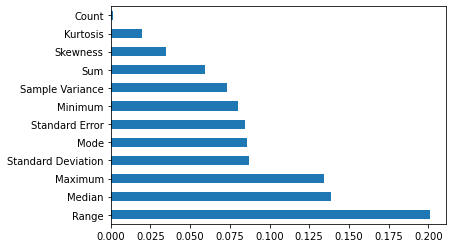

In [51]:
feat_importances=pd.Series(mode.feature_importances_,index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [52]:
dataset=pd.read_csv("x_final_csv.csv")
dataset

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition
0,0.142599,365.0,366,1.425985,2.033434,-0.897223,-0.105681,6,362,368,36513,100,Good
1,0.126027,368.0,368,1.260271,1.588283,-0.395387,0.265678,5,366,371,36826,100,Good
2,0.097333,371.0,371,0.973331,0.947374,-0.400559,-0.177908,4,369,373,37089,100,Good
3,0.099372,373.0,373,0.993718,0.987475,-0.824843,0.072199,4,371,375,37332,100,Good
4,0.094554,376.0,376,0.945537,0.894040,-0.187940,-0.205709,5,373,378,37557,100,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.069559,325.0,330,10.695586,114.395556,0.435310,-0.668873,54,290,344,32322,100,Crater wear
296,1.131819,324.5,327,11.318190,128.101414,-0.008641,-0.555331,53,291,344,32314,100,Crater wear
297,1.137146,316.5,316,11.371464,129.310202,-0.046520,-0.069875,56,285,341,31677,100,Crater wear
298,1.971869,344.5,346,19.718688,388.826667,-0.073315,-1.185157,74,283,357,33304,100,Crater wear


In [53]:
dataset.drop(['Skewness','Kurtosis','Count'],axis=1,inplace=True)

In [54]:
dataset.head()

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Range,Minimum,Maximum,Sum,Condition
0,0.142599,365.0,366,1.425985,2.033434,6,362,368,36513,Good
1,0.126027,368.0,368,1.260271,1.588283,5,366,371,36826,Good
2,0.097333,371.0,371,0.973331,0.947374,4,369,373,37089,Good
3,0.099372,373.0,373,0.993718,0.987475,4,371,375,37332,Good
4,0.094554,376.0,376,0.945537,0.894040,5,373,378,37557,Good


In [55]:
x=dataset.iloc[:,0:9].values
y=dataset.iloc[:,9].values

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [57]:
print(np.unique(y))
print(np.unique(y).sum())

['Crater wear' 'Flank Wear' 'Good' 'Nose Wear' 'Notch wear'
 'Tool breakage ']
Crater wearFlank WearGoodNose WearNotch wearTool breakage 


In [58]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y1=encoder.fit_transform(y)
y2=pd.get_dummies(y1).values

In [59]:
y1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
y2

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [61]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=False,random_state=None)

i=1
for train_index,test_index in kf.split(x,y2):
    print("fold",i)
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y2[train_index],y2[test_index]
    print(x_train,"having:",len(x_train))
    print(x_test,"having:",len(x_test))
    print("--------------------------")
    i+=1

fold 1
[[-0.95423604  0.66794992  0.63486972 ...  0.87556094 -0.07602562
   0.64088103]
 [-0.94700346  0.66794992  0.63486972 ...  0.85549308 -0.07602562
   0.6321411 ]
 [-0.93135395  0.66794992  0.63486972 ...  0.85549308 -0.01739404
   0.63963247]
 ...
 [ 0.12883512 -0.30222382 -0.31879724 ... -0.28837522 -0.31055196
  -0.21500736]
 [ 0.96665167  0.68558944  0.70298879 ... -0.32851095  0.62755339
   0.29284472]
 [-0.0473281   0.79142657  0.77110786 ...  0.91569667  0.68618498
  -8.36186624]] having: 270
[[-0.86939937  1.40880986  1.38417949 -0.866907   -0.45678934 -0.88567023
   1.25685037  1.27250082  1.29450258]
 [-0.88603225  1.51464699  1.45229855 -0.8835291  -0.45781252 -0.90731065
   1.33712183  1.44839558  1.39220246]
 [-0.91483258  1.62048413  1.55447716 -0.91231077 -0.45928563 -0.92895107
   1.39732543  1.56565875  1.47429533]
 [-0.91278638  1.69104222  1.62259623 -0.9102659  -0.45919346 -0.92895107
   1.43746116  1.68292191  1.55014539]
 [-0.91762229  1.79687935  1.72477483

In [62]:
y


array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
     

In [63]:
y1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
x_test.shape

(30, 9)

In [65]:
import tensorflow as tf
from tensorflow import keras

In [66]:
model=keras.Sequential()
model.add(keras.layers.Dense(6,input_shape=(9,),kernel_initializer='he_uniform',activation='relu'))
model.add(keras.layers.Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
model.add(keras.layers.Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
model.add(keras.layers.Dense(units=6,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [67]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
                metrics=['accuracy'])

In [79]:
model_history=model.fit(x_train, y_train,validation_split=.33,batch_size=10, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1705 - accuracy: 0.9389 - val_loss: 25.8764 - val_accuracy: 0.0889
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1735 - accuracy: 0.9333 - val_loss: 25.7925 - val_accuracy: 0.1000
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 0.1710 - accuracy: 0.9333 - val_loss: 25.9462 - val_accuracy: 0.0889
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1687 - accuracy: 0.9333 - val_loss: 25.8993 - val_accuracy: 0.0889
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1718 - accuracy: 0.9333 - val_loss: 26.1430 - val_accuracy: 0.0889
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.1782 - accuracy: 0.9389 - val_loss: 26.0272 - val_accuracy: 0.0889
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.1689 - accuracy: 0.9333 - val_loss: 25.9769 - val_accuracy: 0.0889
Epoch 

18/18 [==============================] - 0s 8ms/step - loss: 0.1676 - accuracy: 0.9278 - val_loss: 27.0345 - val_accuracy: 0.0889
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 0.1668 - accuracy: 0.9333 - val_loss: 27.2882 - val_accuracy: 0.0889
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1660 - accuracy: 0.9333 - val_loss: 27.1573 - val_accuracy: 0.0889
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1638 - accuracy: 0.9389 - val_loss: 27.0731 - val_accuracy: 0.0889
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1651 - accuracy: 0.9333 - val_loss: 27.4039 - val_accuracy: 0.0889
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1647 - accuracy: 0.9278 - val_loss: 27.1347 - val_accuracy: 0.0889
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1664 - accuracy: 0.9333 - val_loss: 27.3938 - val_accuracy: 0.0889
Epoch 65/100

In [83]:
y_pred=model.predict(x_test)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      30.0
           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00      30.0
   macro avg       0.00      0.00      0.00      30.0
weighted avg       0.00      0.00      0.00      30.0



C:\Users\abulf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abulf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

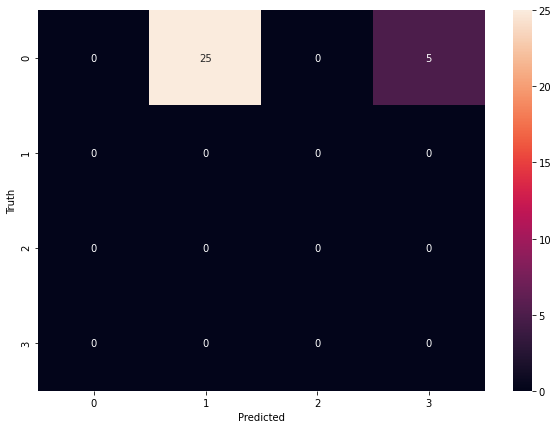

In [82]:
 import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test_class, predictions=y_pred_class)

plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
#accuracy
(13+10+12+14+12+19)/(14+14+13+15+14+20)

0.8888888888888888